# Missing values

Notebook used for missing values experiment. Only cells with reports should be able to run as source data are not provided.

In [1]:
from utils import *

In [ ]:
DATA_AVAILABLE = False

In [2]:
if DATA_AVAILABLE:
    charged_off = pd.read_csv('data\\Charged_Off_Reduced.csv', index_col = 0)
    marked_frauds = pd.read_csv('data\\Frauds_Reduced.csv', index_col = 0)

## Note missing values count

In [4]:
if DATA_AVAILABLE:
    charged_off['Nan count'] = charged_off.isnull().sum(axis=1)
    marked_frauds['Nan count'] =  marked_frauds.isnull().sum(axis=1)

In [5]:
if DATA_AVAILABLE:
    nulls = charged_off.isnull().sum().sum()
    total = charged_off.count().sum()
    print(f'There is {round(nulls / total*100)} % of missing values.')

There is 19.0 % of missing values.


## Drop columns with more than X% of missing values

In [7]:
if DATA_AVAILABLE:
    for p in [0.1, 0.2, 0.5, 0.7, 1]:
        print(f'For p = {p}')
        charged_off_tmp = charged_off.loc[:, charged_off.isnull().sum() <= p * charged_off.shape[0]]
        marked_frauds_tmp = marked_frauds.loc[:, marked_frauds.isnull().sum() <= p * marked_frauds.shape[0]]
        c = stratified_k_fold(charged_off_tmp.fillna(0), [], 'X', verbose=False)
        m = stratified_k_fold(marked_frauds_tmp.fillna(0), [], 'X', verbose=False, f_type='marked')
        c_avg_f = c['f1'].mean()
        m_avg_f = m['f1'].mean()
        print(f'F1 for charged off {c_avg_f}')
        print(f'F1 for marked {m_avg_f}')

For p = 0.1
F1 for charged off 0.18809087574851774
F1 for marked 0.07542943127085405
For p = 0.2
F1 for charged off 0.18667854041050613
F1 for marked 0.07539193261287774
For p = 0.5
F1 for charged off 0.19343791251452053
F1 for marked 0.07512769969940185
For p = 0.7
F1 for charged off 0.21667034522583375
F1 for marked 0.07782216662589302
For p = 1
F1 for charged off 0.2149303888736816
F1 for marked 0.07607514170820406


Drop columns with more than 70% missing values

In [12]:
if DATA_AVAILABLE:
    charged_off = charged_off.loc[:, charged_off.isnull().sum() <= 0.7 * charged_off.shape[0]]
    marked_frauds = marked_frauds.loc[:, marked_frauds.isnull().sum() <= 0.7 * marked_frauds.shape[0]]

## Choose method for impuation

In [13]:
strategies = [SimpleImputer(strategy='mean'), SimpleImputer(strategy='median'), SimpleImputer(strategy='constant', fill_value=0), SimpleImputer(strategy='constant', fill_value=-1)]

In [14]:
if DATA_AVAILABLE:
    df = stratified_k_fold(marked_frauds, strategies, 'Imputation', verbose=False, f_type='marked')
    df.to_csv('experiments/Missing_Values/B.csv')

Overall results (mean): 


f1  \
preprocessor                                      classifier                                      
0                                                 DecisionTreeClassifier(random_state=12)  0.00   
                                                  LogisticRegression(random_state=12)      0.00   
                                                  MLPClassifier(random_state=12)           0.00   
                                                  RandomForestClassifier(random_state=12)  0.00   
                                                  SVC(random_state=12)                     0.00   
SimpleImputer()                                   DecisionTreeClassifier(random_state=12)  0.08   
                                                  LogisticRegression(random_state=12)      0.07   
                                                  MLPClassifier(random_state=12)           0.11   
                                                  RandomForestClassifier(random_state=12)  0.13   
                                                  SVC(random_state=12)                     0.01   
SimpleImputer(fill_value=-1, strategy='constant') DecisionTreeClassifier(random_state=12)  0.07   
                                                  LogisticRegression(random_state=12)      0.09   
                                                  MLPClassifier(random_state=12)           0.08   
                                                  RandomForestClassifier(random_state=12)  0.15   
                                                  SVC(random_state=12)                     0.00   
SimpleImputer(fill_value=0, strategy='constant')  DecisionTreeClassifier(random_state=12)  0.07   
                                                  LogisticRegression(random_state=12)      0.09   
                                                  MLPClassifier(random_state=12)           0.08   
                                                  RandomForestClassifier(random_state=12)  0.15   
                                                  SVC(random_state=12)                     0.00   
SimpleImputer(strategy='median')                  DecisionTreeClassifier(random_state=12)  0.07   
                                                  LogisticRegression(random_state=12)      0.07   
                                                  MLPClassifier(random_state=12)           0.08   
                                                  RandomForestClassifier(random_state=12)  0.14   
                                                  SVC(random_state=12)                     0.00   

                                                                                           precision  \
preprocessor                                      classifier                                           
0                                                 DecisionTreeClassifier(random_state=12)       0.00   
                                                  LogisticRegression(random_state=12)           0.00   
                                                  MLPClassifier(random_state=12)                0.00   
                                                  RandomForestClassifier(random_state=12)       0.00   
                                                  SVC(random_state=12)                          0.00   
SimpleImputer()                                   DecisionTreeClassifier(random_state=12)       0.05   
                                                  LogisticRegression(random_state=12)           0.07   
                                                  MLPClassifier(random_state=12)                0.08   
                                                  RandomForestClassifier(random_state=12)       0.29   
                                                  SVC(random_state=12)                          0.00   
SimpleImputer(fill_value=-1, strategy='constant') DecisionTreeClassifier(random_state=12)       0.04   
                                                  LogisticRegressio

Overall results (max): 


f1  \
preprocessor                                      classifier                                      
0                                                 DecisionTreeClassifier(random_state=12)  0.00   
                                                  LogisticRegression(random_state=12)      0.00   
                                                  MLPClassifier(random_state=12)           0.00   
                                                  RandomForestClassifier(random_state=12)  0.00   
                                                  SVC(random_state=12)                     0.00   
SimpleImputer()                                   DecisionTreeClassifier(random_state=12)  0.17   
                                                  LogisticRegression(random_state=12)      0.10   
                                                  MLPClassifier(random_state=12)           0.26   
                                                  RandomForestClassifier(random_state=12)  0.23   
                                                  SVC(random_state=12)                     0.02   
SimpleImputer(fill_value=-1, strategy='constant') DecisionTreeClassifier(random_state=12)  0.11   
                                                  LogisticRegression(random_state=12)      0.13   
                                                  MLPClassifier(random_state=12)           0.16   
                                                  RandomForestClassifier(random_state=12)  0.30   
                                                  SVC(random_state=12)                     0.02   
SimpleImputer(fill_value=0, strategy='constant')  DecisionTreeClassifier(random_state=12)  0.10   
                                                  LogisticRegression(random_state=12)      0.14   
                                                  MLPClassifier(random_state=12)           0.11   
                                                  RandomForestClassifier(random_state=12)  0.28   
                                                  SVC(random_state=12)                     0.02   
SimpleImputer(strategy='median')                  DecisionTreeClassifier(random_state=12)  0.12   
                                                  LogisticRegression(random_state=12)      0.14   
                                                  MLPClassifier(random_state=12)           0.14   
                                                  RandomForestClassifier(random_state=12)  0.28   
                                                  SVC(random_state=12)                     0.02   

                                                                                           precision  \
preprocessor                                      classifier                                           
0                                                 DecisionTreeClassifier(random_state=12)       0.00   
                                                  LogisticRegression(random_state=12)           0.00   
                                                  MLPClassifier(random_state=12)                0.00   
                                                  RandomForestClassifier(random_state=12)       0.00   
                                                  SVC(random_state=12)                          0.00   
SimpleImputer()                                   DecisionTreeClassifier(random_state=12)       0.14   
                                                  LogisticRegression(random_state=12)           0.15   
                                                  MLPClassifier(random_state=12)                0.25   
                                                  RandomForestClassifier(random_state=12)       0.60   
                                                  SVC(random_state=12)                          0.01   
SimpleImputer(fill_value=-1, strategy='constant') DecisionTreeClassifier(random_state=12)       0.08   
                                                  LogisticRegressio

Grouped by Preprocessor (mean):


,f1,precision,recall
preprocessor,,,
0,0.00,0.00,0.00
SimpleImputer(),0.08,0.10,0.36
"SimpleImputer(fill_value=-1, strategy='constant')",0.08,0.09,0.37
"SimpleImputer(fill_value=0, strategy='constant')",0.08,0.10,0.37
SimpleImputer(strategy='median'),0.07,0.09,0.35


Grouped by Classifier (mean):


,f1,precision,recall
classifier,,,
DecisionTreeClassifier(random_state=12),0.05,0.04,0.35
LogisticRegression(random_state=12),0.06,0.05,0.31
MLPClassifier(random_state=12),0.07,0.05,0.37
RandomForestClassifier(random_state=12),0.11,0.24,0.26
SVC(random_state=12),0.00,0.00,0.16


Top 10 by f1:


,Unnamed: 0,classifier,preprocessor,prior,f1,precision,recall,dataset_description
68,68,RandomForestClassifier(random_state=12),"SimpleImputer(fill_value=-1, strategy='constant')",0.10,0.30,0.47,0.23,Imputation
67,67,RandomForestClassifier(random_state=12),"SimpleImputer(fill_value=0, strategy='constant')",0.10,0.28,0.42,0.22,Imputation
66,66,RandomForestClassifier(random_state=12),SimpleImputer(strategy='median'),0.10,0.28,0.57,0.19,Imputation
0,0,MLPClassifier(random_state=12),SimpleImputer(),0.01,0.26,0.25,0.32,Imputation
65,65,RandomForestClassifier(random_state=12),SimpleImputer(),0.10,0.23,0.52,0.15,Imputation
92,92,RandomForestClassifier(random_state=12),"SimpleImputer(fill_value=0, strategy='constant')",0.25,0.20,0.12,0.52,Imputation
42,42,RandomForestClassifier(random_state=12),"SimpleImputer(fill_value=0, strategy='constant')",0.05,0.19,0.67,0.12,Imputation
93,93,RandomForestClassifier(random_state=12),"SimpleImputer(fill_value=-1, strategy='constant')",0.25,0.19,0.11,0.55,Imputation
90,90,RandomForestClassifier(random_state=12),SimpleImputer(),0.25,0.19,0.13,0.43,Imputation
91,91,RandomForestClassifier(random_state=12),SimpleImputer(strategy='median'),0.25,0.18,0.11,0.48,Imputation


Top 10 by precision:


,Unnamed: 0,classifier,preprocessor,prior,f1,precision,recall,dataset_description
41,41,RandomForestClassifier(random_state=12),SimpleImputer(strategy='median'),0.05,0.14,0.70,0.08,Imputation
42,42,RandomForestClassifier(random_state=12),"SimpleImputer(fill_value=0, strategy='constant')",0.05,0.19,0.67,0.12,Imputation
43,43,RandomForestClassifier(random_state=12),"SimpleImputer(fill_value=-1, strategy='constant')",0.05,0.17,0.65,0.10,Imputation
40,40,RandomForestClassifier(random_state=12),SimpleImputer(),0.05,0.13,0.60,0.07,Imputation
66,66,RandomForestClassifier(random_state=12),SimpleImputer(strategy='median'),0.10,0.28,0.57,0.19,Imputation
65,65,RandomForestClassifier(random_state=12),SimpleImputer(),0.10,0.23,0.52,0.15,Imputation
68,68,RandomForestClassifier(random_state=12),"SimpleImputer(fill_value=-1, strategy='constant')",0.10,0.30,0.47,0.23,Imputation
67,67,RandomForestClassifier(random_state=12),"SimpleImputer(fill_value=0, strategy='constant')",0.10,0.28,0.42,0.22,Imputation
17,17,RandomForestClassifier(random_state=12),"SimpleImputer(fill_value=0, strategy='constant')",0.01,0.05,0.30,0.03,Imputation
0,0,MLPClassifier(random_state=12),SimpleImputer(),0.01,0.26,0.25,0.32,Imputation


Top 10 by recall:


,Unnamed: 0,classifier,preprocessor,prior,f1,precision,recall,dataset_description
111,111,SVC(random_state=12),SimpleImputer(strategy='median'),0.5,0.02,0.01,0.99,Imputation
112,112,SVC(random_state=12),"SimpleImputer(fill_value=0, strategy='constant')",0.5,0.02,0.01,0.99,Imputation
110,110,SVC(random_state=12),SimpleImputer(),0.5,0.02,0.01,0.99,Imputation
113,113,SVC(random_state=12),"SimpleImputer(fill_value=-1, strategy='constant')",0.5,0.02,0.01,0.97,Imputation
116,116,RandomForestClassifier(random_state=12),SimpleImputer(strategy='median'),0.5,0.05,0.03,0.84,Imputation
115,115,RandomForestClassifier(random_state=12),SimpleImputer(),0.5,0.05,0.02,0.83,Imputation
123,123,LogisticRegression(random_state=12),"SimpleImputer(fill_value=-1, strategy='constant')",0.5,0.04,0.02,0.82,Imputation
105,105,DecisionTreeClassifier(random_state=12),SimpleImputer(),0.5,0.03,0.02,0.80,Imputation
118,118,RandomForestClassifier(random_state=12),"SimpleImputer(fill_value=-1, strategy='constant')",0.5,0.05,0.03,0.80,Imputation
122,122,LogisticRegression(random_state=12),"SimpleImputer(fill_value=0, strategy='constant')",0.5,0.04,0.02,0.78,Imputation


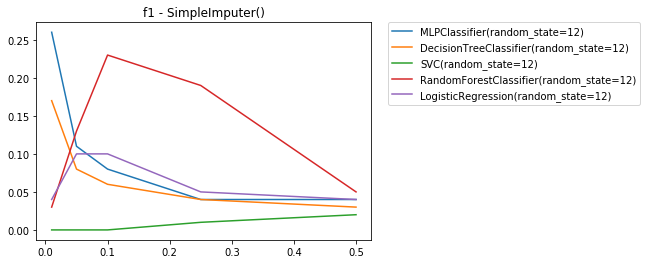

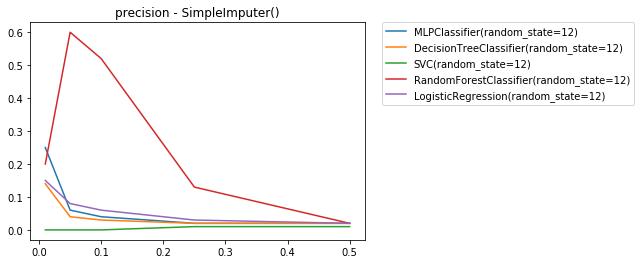

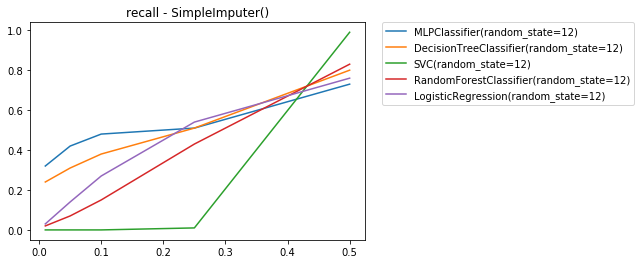

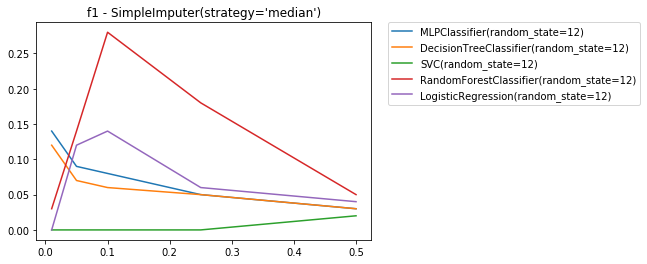

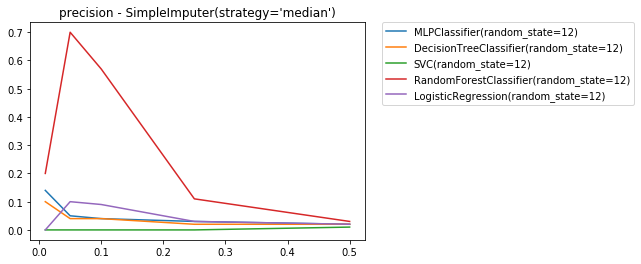

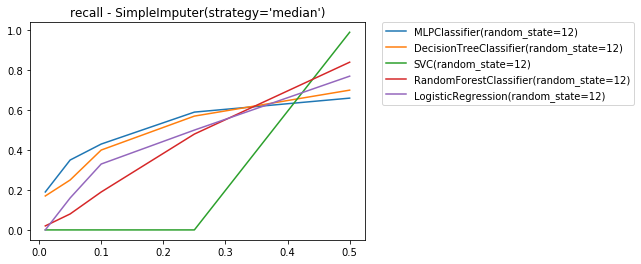

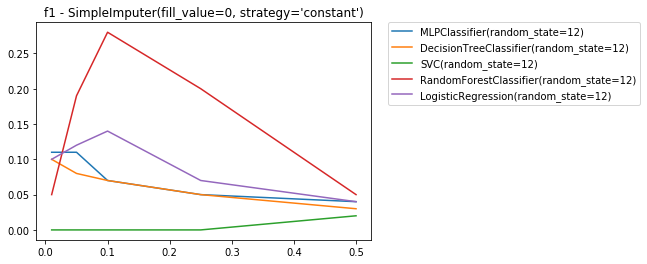

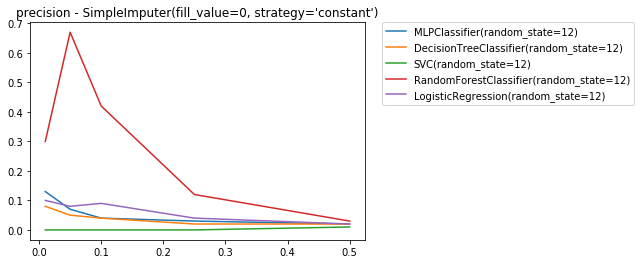

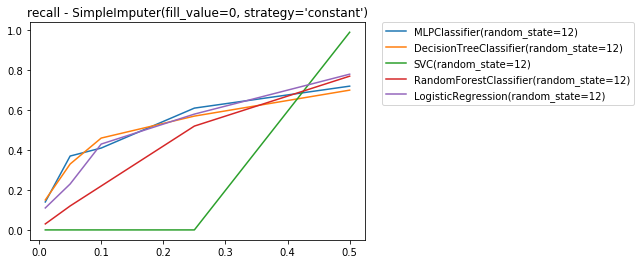

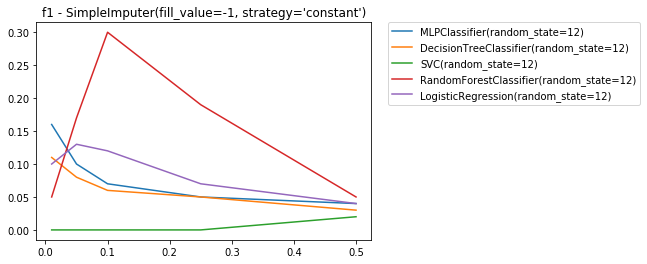

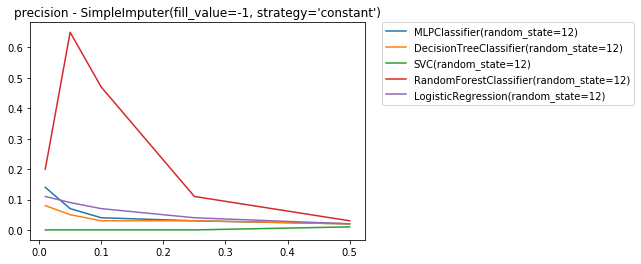

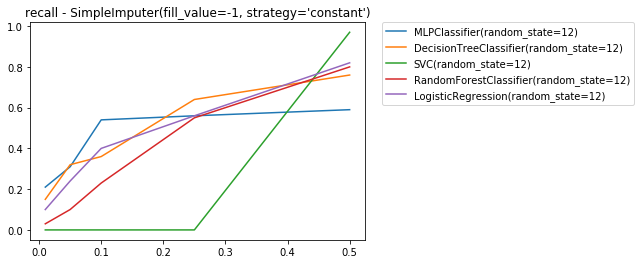

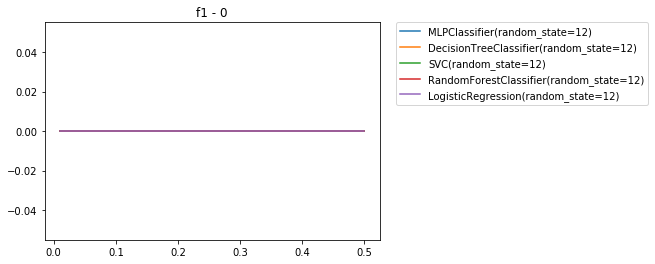

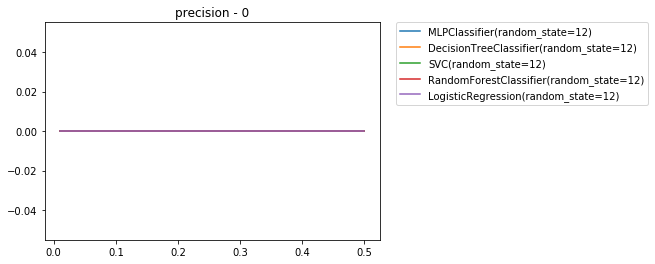

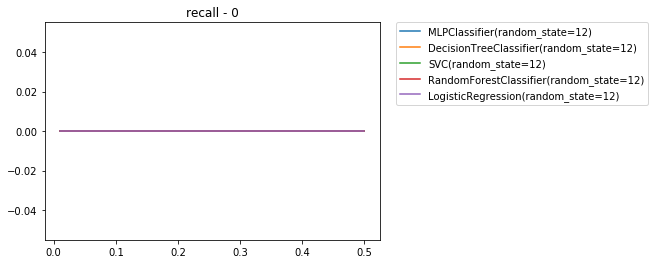

In [39]:
# Note that reports are not in html exported version
get_report(pd.read_csv('experiments/Missing_Values/B.csv').fillna(0))

In [19]:
if DATA_AVAILABLE:
    df = stratified_k_fold(charged_off, strategies, 'Imputation', verbose=False)
    df.to_csv('experiments/Missing_Values/A.csv')

Overall results (mean): 


f1  \
preprocessor                                      classifier                                      
0                                                 DecisionTreeClassifier(random_state=12)  0.00   
                                                  LogisticRegression(random_state=12)      0.00   
                                                  MLPClassifier(random_state=12)           0.00   
                                                  RandomForestClassifier(random_state=12)  0.00   
                                                  SVC(random_state=12)                     0.00   
SimpleImputer()                                   DecisionTreeClassifier(random_state=12)  0.27   
                                                  LogisticRegression(random_state=12)      0.11   
                                                  MLPClassifier(random_state=12)           0.27   
                                                  RandomForestClassifier(random_state=12)  0.34   
                                                  SVC(random_state=12)                     0.02   
SimpleImputer(fill_value=-1, strategy='constant') DecisionTreeClassifier(random_state=12)  0.28   
                                                  LogisticRegression(random_state=12)      0.20   
                                                  MLPClassifier(random_state=12)           0.30   
                                                  RandomForestClassifier(random_state=12)  0.35   
                                                  SVC(random_state=12)                     0.02   
SimpleImputer(fill_value=0, strategy='constant')  DecisionTreeClassifier(random_state=12)  0.27   
                                                  LogisticRegression(random_state=12)      0.17   
                                                  MLPClassifier(random_state=12)           0.30   
                                                  RandomForestClassifier(random_state=12)  0.34   
                                                  SVC(random_state=12)                     0.02   
SimpleImputer(strategy='median')                  DecisionTreeClassifier(random_state=12)  0.26   
                                                  LogisticRegression(random_state=12)      0.11   
                                                  MLPClassifier(random_state=12)           0.22   
                                                  RandomForestClassifier(random_state=12)  0.34   
                                                  SVC(random_state=12)                     0.02   

                                                                                           precision  \
preprocessor                                      classifier                                           
0                                                 DecisionTreeClassifier(random_state=12)       0.00   
                                                  LogisticRegression(random_state=12)           0.00   
                                                  MLPClassifier(random_state=12)                0.00   
                                                  RandomForestClassifier(random_state=12)       0.00   
                                                  SVC(random_state=12)                          0.00   
SimpleImputer()                                   DecisionTreeClassifier(random_state=12)       0.20   
                                                  LogisticRegression(random_state=12)           0.13   
                                                  MLPClassifier(random_state=12)                0.22   
                                                  RandomForestClassifier(random_state=12)       0.57   
                                                  SVC(random_state=12)                          0.01   
SimpleImputer(fill_value=-1, strategy='constant') DecisionTreeClassifier(random_state=12)       0.20   
                                                  LogisticRegressio

Overall results (max): 


f1  \
preprocessor                                      classifier                                      
0                                                 DecisionTreeClassifier(random_state=12)  0.00   
                                                  LogisticRegression(random_state=12)      0.00   
                                                  MLPClassifier(random_state=12)           0.00   
                                                  RandomForestClassifier(random_state=12)  0.00   
                                                  SVC(random_state=12)                     0.00   
SimpleImputer()                                   DecisionTreeClassifier(random_state=12)  0.33   
                                                  LogisticRegression(random_state=12)      0.19   
                                                  MLPClassifier(random_state=12)           0.32   
                                                  RandomForestClassifier(random_state=12)  0.43   
                                                  SVC(random_state=12)                     0.09   
SimpleImputer(fill_value=-1, strategy='constant') DecisionTreeClassifier(random_state=12)  0.34   
                                                  LogisticRegression(random_state=12)      0.28   
                                                  MLPClassifier(random_state=12)           0.34   
                                                  RandomForestClassifier(random_state=12)  0.45   
                                                  SVC(random_state=12)                     0.09   
SimpleImputer(fill_value=0, strategy='constant')  DecisionTreeClassifier(random_state=12)  0.30   
                                                  LogisticRegression(random_state=12)      0.23   
                                                  MLPClassifier(random_state=12)           0.34   
                                                  RandomForestClassifier(random_state=12)  0.43   
                                                  SVC(random_state=12)                     0.10   
SimpleImputer(strategy='median')                  DecisionTreeClassifier(random_state=12)  0.31   
                                                  LogisticRegression(random_state=12)      0.16   
                                                  MLPClassifier(random_state=12)           0.24   
                                                  RandomForestClassifier(random_state=12)  0.44   
                                                  SVC(random_state=12)                     0.09   

                                                                                           precision  \
preprocessor                                      classifier                                           
0                                                 DecisionTreeClassifier(random_state=12)       0.00   
                                                  LogisticRegression(random_state=12)           0.00   
                                                  MLPClassifier(random_state=12)                0.00   
                                                  RandomForestClassifier(random_state=12)       0.00   
                                                  SVC(random_state=12)                          0.00   
SimpleImputer()                                   DecisionTreeClassifier(random_state=12)       0.29   
                                                  LogisticRegression(random_state=12)           0.16   
                                                  MLPClassifier(random_state=12)                0.34   
                                                  RandomForestClassifier(random_state=12)       0.99   
                                                  SVC(random_state=12)                          0.05   
SimpleImputer(fill_value=-1, strategy='constant') DecisionTreeClassifier(random_state=12)       0.30   
                                                  LogisticRegressio

Grouped by Preprocessor (mean):


,f1,precision,recall
preprocessor,,,
0,0.00,0.00,0.00
SimpleImputer(),0.20,0.22,0.41
"SimpleImputer(fill_value=-1, strategy='constant')",0.23,0.24,0.43
"SimpleImputer(fill_value=0, strategy='constant')",0.22,0.24,0.43
SimpleImputer(strategy='median'),0.19,0.24,0.39


Grouped by Classifier (mean):


,f1,precision,recall
classifier,,,
DecisionTreeClassifier(random_state=12),0.18,0.13,0.36
LogisticRegression(random_state=12),0.10,0.11,0.20
MLPClassifier(random_state=12),0.18,0.15,0.35
RandomForestClassifier(random_state=12),0.23,0.38,0.31
SVC(random_state=12),0.02,0.01,0.16


Top 10 by f1:


,Unnamed: 0,classifier,preprocessor,prior,f1,precision,recall,dataset_description
81,81,RandomForestClassifier(random_state=12),"SimpleImputer(fill_value=-1, strategy='constant')",0.25,0.45,0.35,0.62,Imputation
79,79,RandomForestClassifier(random_state=12),SimpleImputer(strategy='median'),0.25,0.44,0.36,0.57,Imputation
78,78,RandomForestClassifier(random_state=12),SimpleImputer(),0.25,0.43,0.33,0.59,Imputation
80,80,RandomForestClassifier(random_state=12),"SimpleImputer(fill_value=0, strategy='constant')",0.25,0.43,0.33,0.61,Imputation
51,51,RandomForestClassifier(random_state=12),"SimpleImputer(fill_value=-1, strategy='constant')",0.10,0.38,0.76,0.26,Imputation
49,49,RandomForestClassifier(random_state=12),SimpleImputer(strategy='median'),0.10,0.36,0.83,0.23,Imputation
50,50,RandomForestClassifier(random_state=12),"SimpleImputer(fill_value=0, strategy='constant')",0.10,0.36,0.76,0.24,Imputation
48,48,RandomForestClassifier(random_state=12),SimpleImputer(),0.10,0.36,0.79,0.23,Imputation
32,32,MLPClassifier(random_state=12),"SimpleImputer(fill_value=0, strategy='constant')",0.10,0.34,0.27,0.48,Imputation
9,9,DecisionTreeClassifier(random_state=12),"SimpleImputer(fill_value=-1, strategy='constant')",0.05,0.34,0.30,0.38,Imputation


Top 10 by precision:


,Unnamed: 0,classifier,preprocessor,prior,f1,precision,recall,dataset_description
19,19,RandomForestClassifier(random_state=12),SimpleImputer(strategy='median'),0.05,0.28,0.99,0.17,Imputation
18,18,RandomForestClassifier(random_state=12),SimpleImputer(),0.05,0.29,0.99,0.17,Imputation
20,20,RandomForestClassifier(random_state=12),"SimpleImputer(fill_value=0, strategy='constant')",0.05,0.30,0.97,0.18,Imputation
21,21,RandomForestClassifier(random_state=12),"SimpleImputer(fill_value=-1, strategy='constant')",0.05,0.29,0.95,0.17,Imputation
49,49,RandomForestClassifier(random_state=12),SimpleImputer(strategy='median'),0.10,0.36,0.83,0.23,Imputation
48,48,RandomForestClassifier(random_state=12),SimpleImputer(),0.10,0.36,0.79,0.23,Imputation
50,50,RandomForestClassifier(random_state=12),"SimpleImputer(fill_value=0, strategy='constant')",0.10,0.36,0.76,0.24,Imputation
51,51,RandomForestClassifier(random_state=12),"SimpleImputer(fill_value=-1, strategy='constant')",0.10,0.38,0.76,0.26,Imputation
2,2,MLPClassifier(random_state=12),"SimpleImputer(fill_value=0, strategy='constant')",0.05,0.33,0.36,0.35,Imputation
79,79,RandomForestClassifier(random_state=12),SimpleImputer(strategy='median'),0.25,0.44,0.36,0.57,Imputation


Top 10 by recall:


,Unnamed: 0,classifier,preprocessor,prior,f1,precision,recall,dataset_description
102,102,SVC(random_state=12),SimpleImputer(),0.5,0.09,0.05,0.99,Imputation
105,105,SVC(random_state=12),"SimpleImputer(fill_value=-1, strategy='constant')",0.5,0.09,0.05,0.98,Imputation
103,103,SVC(random_state=12),SimpleImputer(strategy='median'),0.5,0.09,0.05,0.97,Imputation
104,104,SVC(random_state=12),"SimpleImputer(fill_value=0, strategy='constant')",0.5,0.10,0.05,0.97,Imputation
111,111,RandomForestClassifier(random_state=12),"SimpleImputer(fill_value=-1, strategy='constant')",0.5,0.29,0.17,0.87,Imputation
109,109,RandomForestClassifier(random_state=12),SimpleImputer(strategy='median'),0.5,0.29,0.18,0.87,Imputation
110,110,RandomForestClassifier(random_state=12),"SimpleImputer(fill_value=0, strategy='constant')",0.5,0.29,0.17,0.86,Imputation
108,108,RandomForestClassifier(random_state=12),SimpleImputer(),0.5,0.28,0.17,0.86,Imputation
90,90,MLPClassifier(random_state=12),SimpleImputer(),0.5,0.20,0.12,0.79,Imputation
117,117,LogisticRegression(random_state=12),"SimpleImputer(fill_value=-1, strategy='constant')",0.5,0.22,0.13,0.76,Imputation


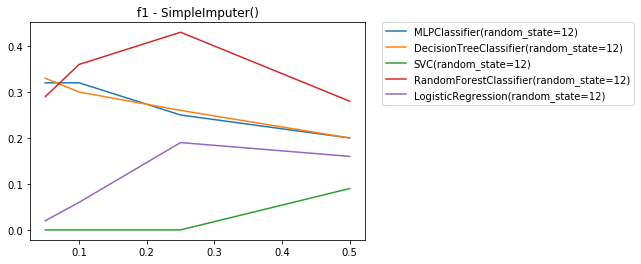

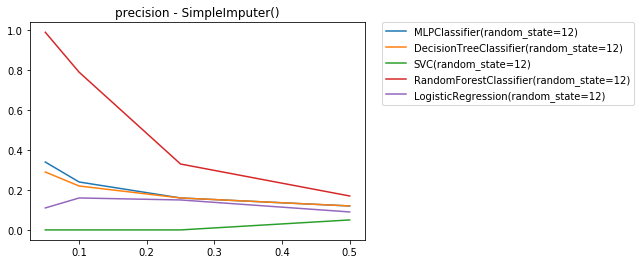

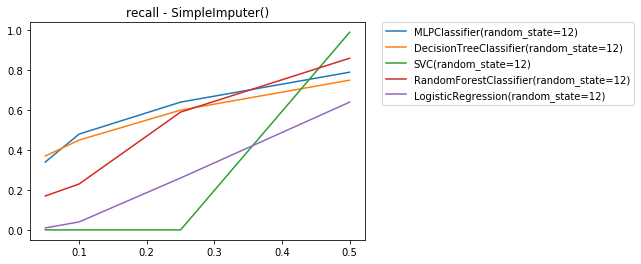

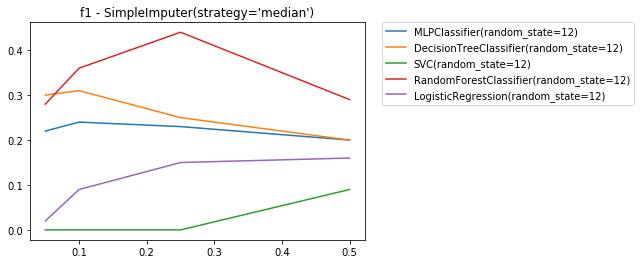

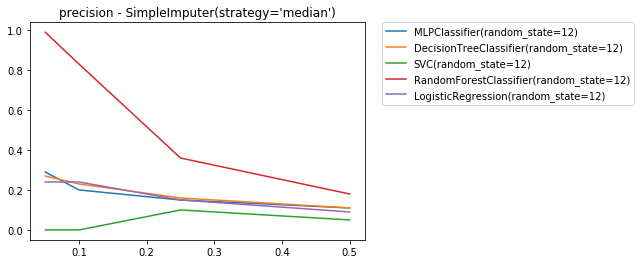

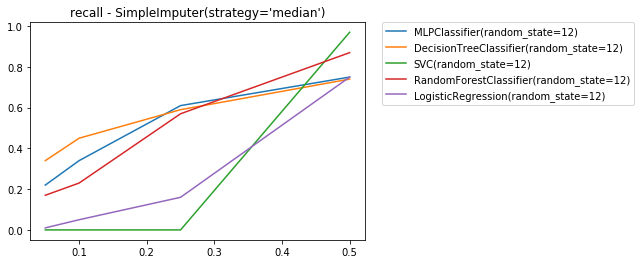

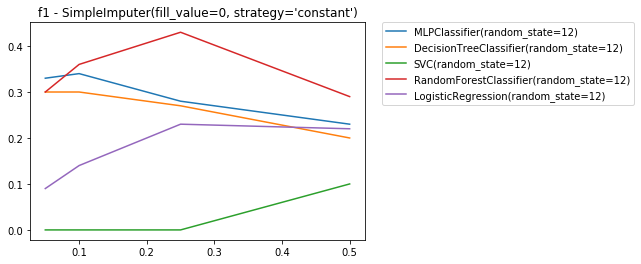

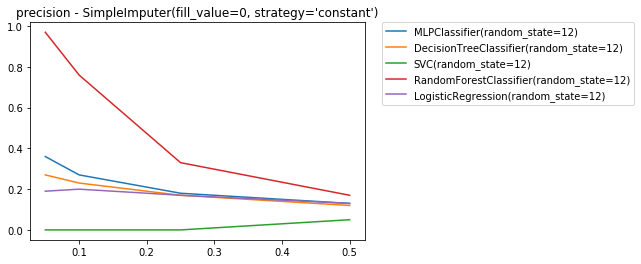

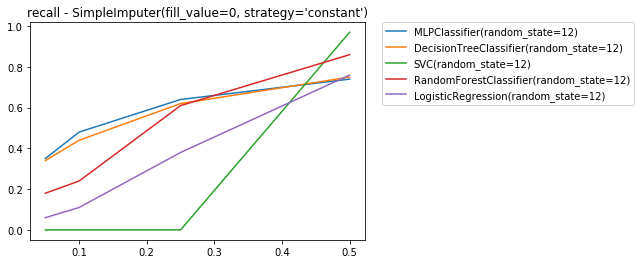

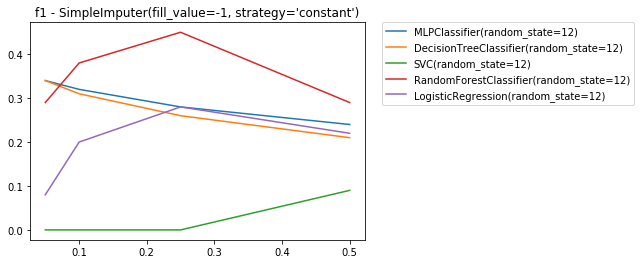

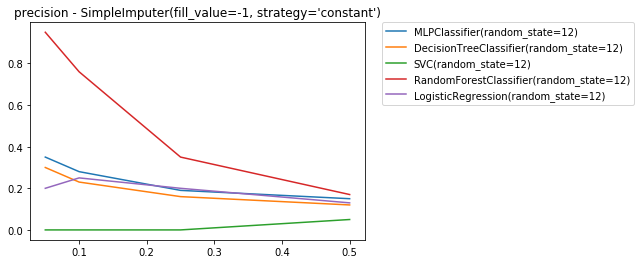

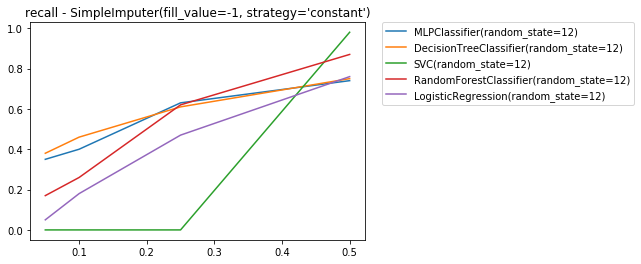

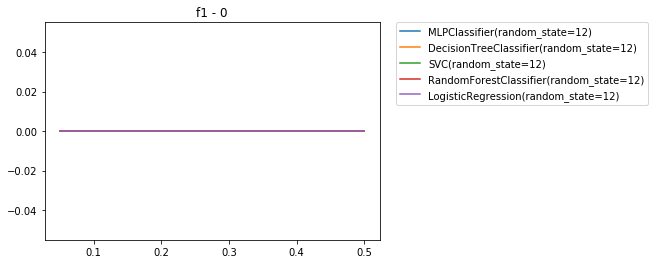

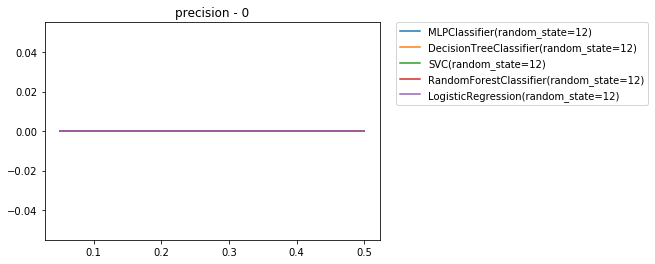

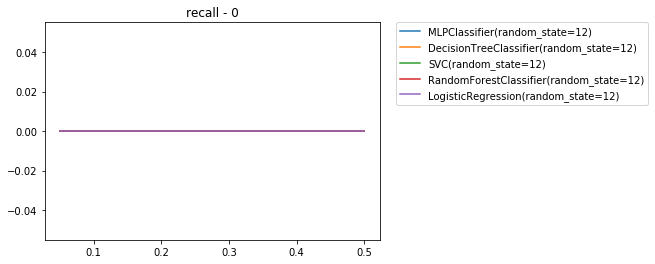

In [38]:
# Note that reports are not in html exported version
get_report(pd.read_csv('experiments/Missing_Values/A.csv').fillna(0))

## Save chosen method

In [22]:
charged_off.fillna(-1).to_csv('data/Charged_Off_Imputed.csv')
marked_frauds.fillna(0).to_csv('data/Marked_Imputed.csv')